In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import uuid
from faker import Faker
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import warnings  
warnings.filterwarnings('ignore')

Создание данных

In [2]:
n_samples = 300

stud_id = [uuid.uuid4().hex for x in range(n_samples)]
name = [Faker().name() for x in range(n_samples)]
specialty = random.choices(['Mathematics', 'Chemistry', 'Architecture', 'Urbanistics', 'Computer Facilities', 'Power-plant Engineering', 'Mechanical Engineering', 'Biotechnology'], k=n_samples)
admission_year = random.choices([2017, 2018, 2019, 2020], k=n_samples)
coef = random.choices([1, 1.2, 1.5], k=n_samples)
activ_points = random.choices([x for x in range(11)], k=n_samples)
sport_achiev_points = random.choices([0, 5], k=n_samples)
sport_type = [0 for x in range(n_samples)]
edu_points = random.choices([0, 1, 2, 5], k=n_samples)
data = pd.DataFrame({'stud_id': stud_id, 'name': name,'specialty': specialty, 'coef': coef, 'activ_points': activ_points, 'sport_achiev_points': sport_achiev_points, 'sport_type': sport_type, 'edu_points': edu_points})
data['admission_year'] = admission_year
data['previous_total_points'] = random.choices([x for x in range(25)], k=n_samples)
data['total_points'] =  data[['activ_points', 'sport_achiev_points', 'edu_points']].sum(axis=1)
data['application'] = random.choices([0, 1], weights=[0.2, 0.8], k=n_samples)
data['application_date'] = [0 for x in range(n_samples)]
dates = pd.date_range(datetime.datetime(2021, 3, 1),datetime.datetime(2021, 5, 1)).strftime('%d.%m.%Y').tolist()
applics = np.where(data.application==1)
sports = np.where(data.sport_achiev_points==5)
for x in applics[0]:
    data['application_date'][x] = random.choice(dates)
for x in sports[0]:
    data['sport_type'][x] = random.choice(['Basketball', 'Volleyball', 'Athletics', 'Hockey', 'Tennis', 'Football', 'Gymnastics'])
data['increase'] = data['total_points'] * data['application'] * data['coef'] * 500

In [3]:
data

,stud_id,name,specialty,coef,activ_points,sport_achiev_points,sport_type,edu_points,admission_year,previous_total_points,total_points,application,application_date,increase
0,14031c533dbc45b0bb4a9d99e19b1cb7,Emma Garcia,Mechanical Engineering,1.5,7,5,Basketball,2,2017,1,14,1,19.03.2021,10500.0
1,28a8756d7e484657b6b24c6d5bd2ff8c,Anthony Williams,Mechanical Engineering,1.5,3,5,Athletics,0,2018,7,8,1,24.03.2021,6000.0
2,e94240855d28486aa800122534f32a21,Michael Khan,Power-plant Engineering,1.5,6,0,0,5,2020,1,11,1,12.03.2021,8250.0
3,2406a05f4f66445e8423bd02f007543c,Taylor Daniels,Mathematics,1.5,1,5,Hockey,2,2019,19,8,1,22.03.2021,6000.0
4,773a4cd3c5df444ba1c6564ee5ccac97,Carrie Henry,Computer Facilities,1.0,2,5,Volleyball,5,2017,14,12,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,28ca5b867c2443999adf7a0b438ec14b,Jacqueline Bennett,Computer Facilities,1.2,2,5,Tennis,1,2019,9,8,1,21.03.2021,4800.0
296,f4b5e5d87ee3403dbbd82a096823bcef,Joe Gonzales,Mathematics,1.2,7,0,0,5,2018,21,12,0,0,0.0
297,bfbe05679da147d4a0b84cfcead4f0ce,Bradley Novak,Architecture,1.2,2,0,0,2,2018,2,4,1,07.03.2021,2400.0
298,c7845db2846c415fbbe3af5933d418ee,Martha Nguyen,Computer Facilities,1.5,0,5,Basketball,0,2018,11,5,1,08.03.2021,3750.0


Разбор данных

In [4]:
data.describe()

,coef,activ_points,sport_achiev_points,edu_points,admission_year,previous_total_points,total_points,application,increase
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.227333,4.56000,2.600000,2.216667,2018.430000,11.763333,9.376667,0.756667,4467.666667
std,0.209601,3.02383,2.502173,1.908366,1.123674,7.132805,4.012704,0.429812,3504.913592
min,1.000000,0.00000,0.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.00000,0.000000,1.000000,2017.000000,6.000000,7.000000,1.000000,575.000000
50%,1.200000,4.00000,5.000000,2.000000,2018.000000,11.000000,9.000000,1.000000,4500.000000
75%,1.500000,7.00000,5.000000,5.000000,2019.000000,18.000000,12.000000,1.000000,7050.000000
max,1.500000,10.00000,5.000000,5.000000,2020.000000,24.000000,19.000000,1.000000,14250.000000


In [5]:
data['application_date'].unique()

array(['19.03.2021', '24.03.2021', '12.03.2021', '22.03.2021', 0,
       '21.04.2021', '08.04.2021', '22.04.2021', '16.03.2021',
       '13.04.2021', '14.03.2021', '18.03.2021', '29.03.2021',
       '04.04.2021', '21.03.2021', '02.04.2021', '28.04.2021',
       '31.03.2021', '11.04.2021', '05.04.2021', '19.04.2021',
       '13.03.2021', '27.04.2021', '26.03.2021', '05.03.2021',
       '29.04.2021', '27.03.2021', '04.03.2021', '03.03.2021',
       '10.03.2021', '20.03.2021', '17.04.2021', '17.03.2021',
       '06.04.2021', '25.03.2021', '09.04.2021', '01.04.2021',
       '11.03.2021', '15.03.2021', '23.03.2021', '07.03.2021',
       '02.03.2021', '18.04.2021', '10.04.2021', '09.03.2021',
       '30.04.2021', '01.03.2021', '28.03.2021', '25.04.2021',
       '12.04.2021', '03.04.2021', '23.04.2021', '14.04.2021',
       '15.04.2021', '24.04.2021', '16.04.2021', '07.04.2021',
       '01.05.2021', '30.03.2021', '08.03.2021'], dtype=object)

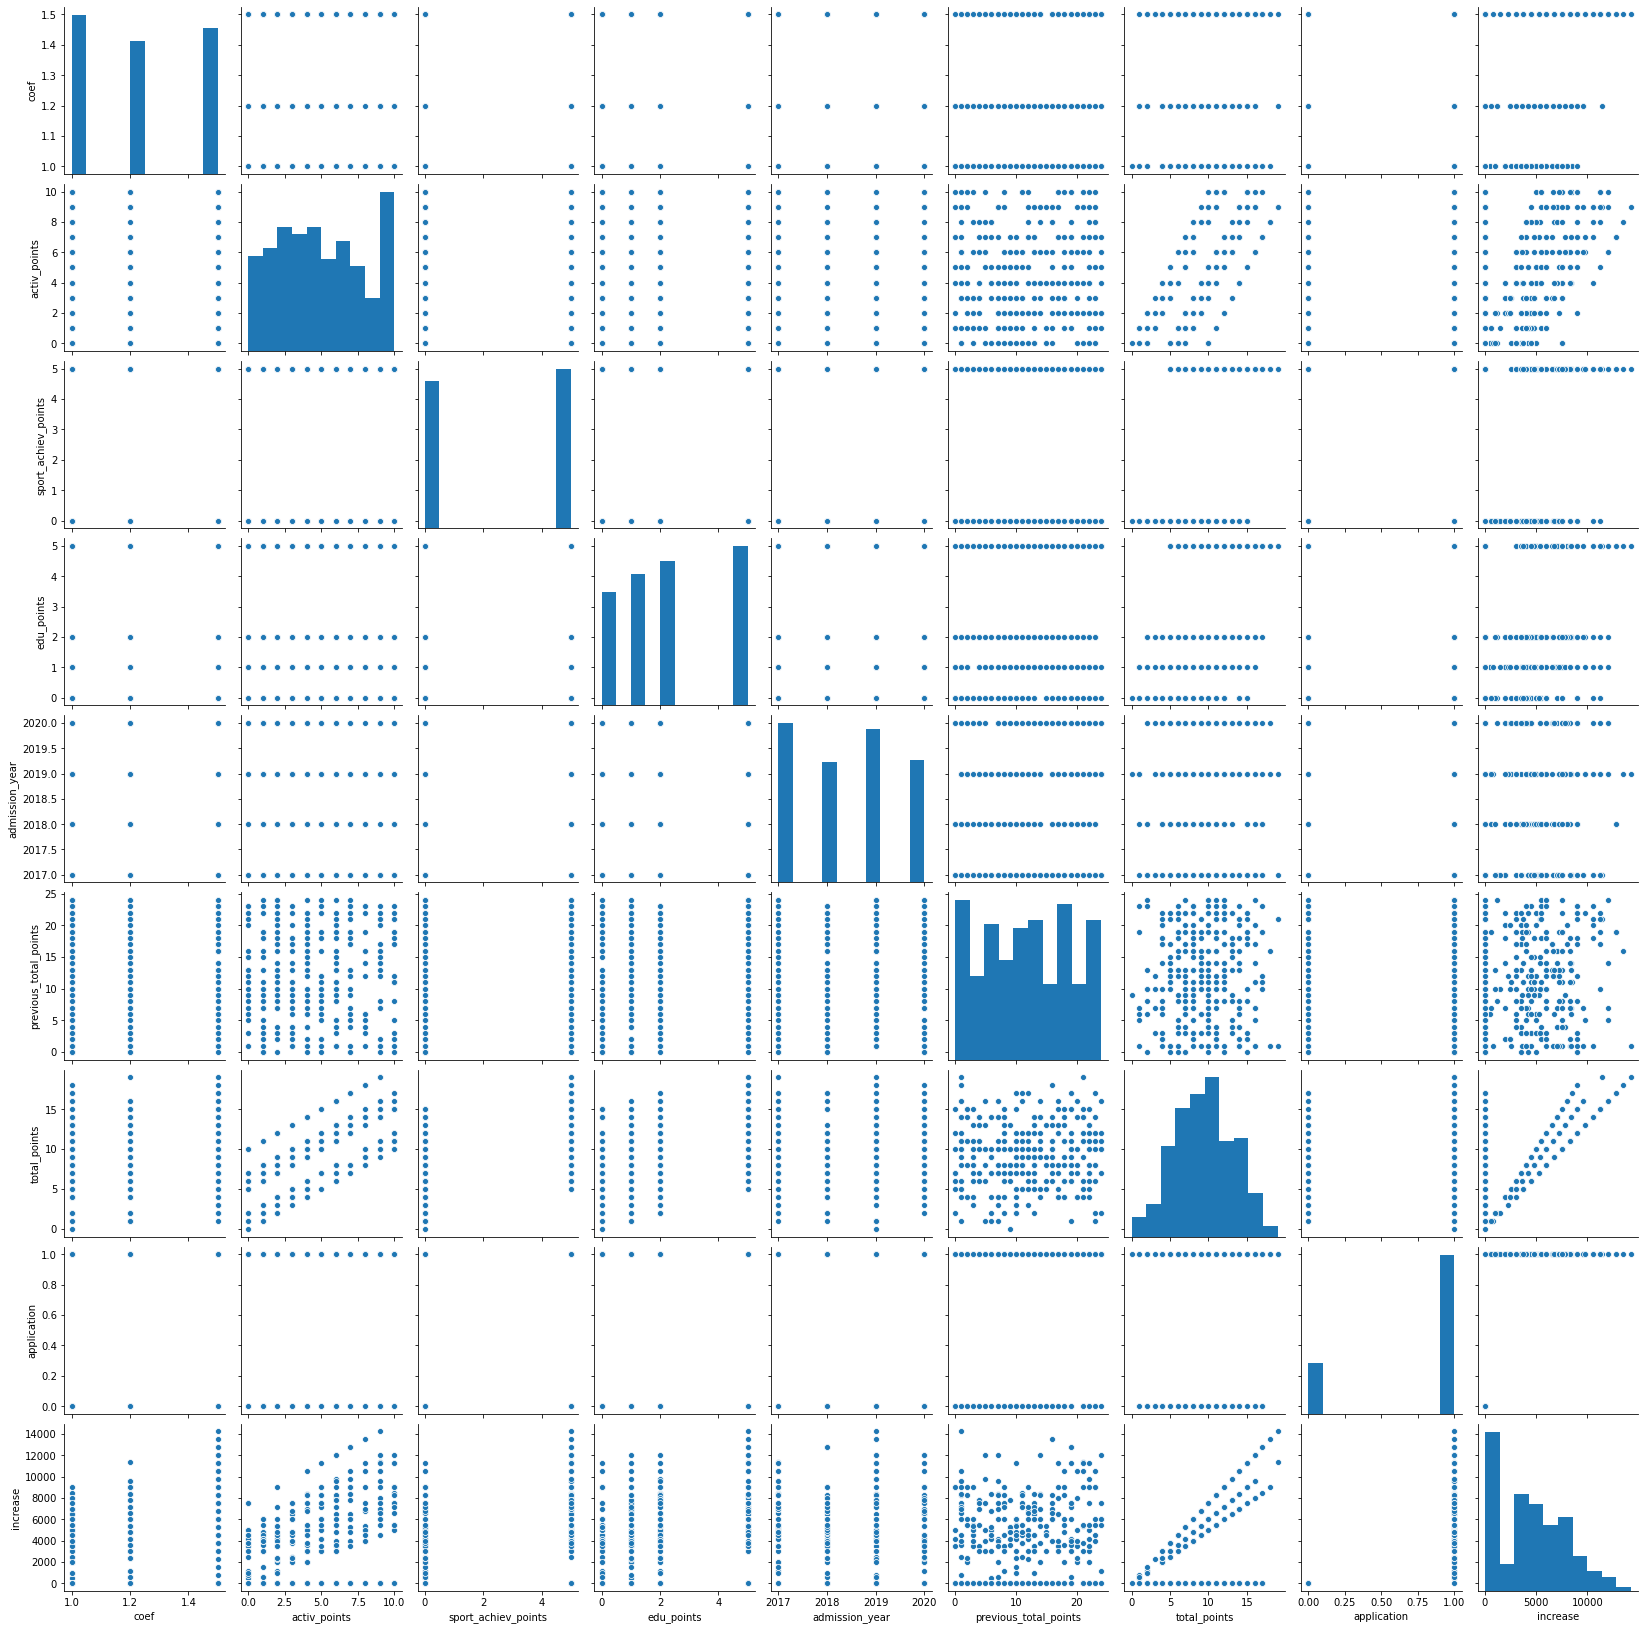

In [6]:
sns.pairplot(data)

*Пропущенных значений нет, заметных в числовых признаках аномалий тоже нет
Столбцы stud_id и name уникальны и не повлияют на таргет increase, в модели их можно будет опустить
specialty - категориальный признак, будет заменен на ряд столбцов-индикаторов
admission_year - аналогично
coef - аналогично
activ_points (ряд целочисленных значений от 1 до 10) и sport_achiev_points (0/5), а также edu_points (0/1/2/5) суммируются в total_points, который, судя по графику, наиболее существенно влияет на increase
previous_total_points имеет похожие значения
application - бинарный, означает, была ли подана ли заявка, умножение некоторых других признаков на этот столбец очевидно даст значение таргета
application_date - уточняет дату поданной заявки, даты варьируются в пределах нескольких месяцев одного года, их можно заменить порядковыми номерами, чтобы работать с числами*

Применение модели по всем данным

In [7]:
data['application_date'] = pd.to_datetime(data['application_date']).map(datetime.datetime.toordinal)

In [8]:
dum = pd.get_dummies(data[['specialty', 'sport_type']])
X = dum.join(data.drop(columns=['stud_id', 'name', 'specialty', 'sport_type', 'increase']))

In [9]:
y = data['increase']

In [10]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.820502131519275

Проверяем, можем ли улучшить модель

*Признаков много, поэтому пробуем 4 степень*

In [11]:
dict_ = {}
i = 0
nn = range(25)

for x in X.columns.values:
    dict_[x] = 'x' + str(nn[i])
    i+=1
dict_

{'specialty_Architecture': 'x0',
 'specialty_Biotechnology': 'x1',
 'specialty_Chemistry': 'x2',
 'specialty_Computer Facilities': 'x3',
 'specialty_Mathematics': 'x4',
 'specialty_Mechanical Engineering': 'x5',
 'specialty_Power-plant Engineering': 'x6',
 'specialty_Urbanistics': 'x7',
 'sport_type_0': 'x8',
 'sport_type_Athletics': 'x9',
 'sport_type_Basketball': 'x10',
 'sport_type_Football': 'x11',
 'sport_type_Gymnastics': 'x12',
 'sport_type_Hockey': 'x13',
 'sport_type_Tennis': 'x14',
 'sport_type_Volleyball': 'x15',
 'coef': 'x16',
 'activ_points': 'x17',
 'sport_achiev_points': 'x18',
 'edu_points': 'x19',
 'admission_year': 'x20',
 'previous_total_points': 'x21',
 'total_points': 'x22',
 'application': 'x23',
 'application_date': 'x24'}

In [12]:
poly = PolynomialFeatures(4)
dum = pd.get_dummies(data[['specialty', 'sport_type']])
X = dum.join(data.drop(columns=['stud_id', 'name', 'specialty', 'sport_type', 'increase']))
X = poly.fit_transform(X)

y = data['increase']

model = LinearRegression().fit(X, y)
model.score(X, y)

0.999983943603767

*Определим наиболее весомые коэффициенты*

In [13]:
weights = dict(zip(model.coef_, poly.get_feature_names()))
weights = sorted(weights.items())
weights[-10:]

[(6.29321978656964e-07, 'x4 x20^2 x24'),
 (6.792069906873148e-07, 'x5 x18 x20 x24'),
 (6.988397054565712e-07, 'x15 x20 x22 x24'),
 (8.137889495691947e-07, 'x7 x20 x22 x24'),
 (8.56868519117876e-07, 'x14 x17 x20 x24'),
 (8.676155801486903e-07, 'x6 x18 x20 x24'),
 (1.1121663486281203e-06, 'x7 x17 x20 x24'),
 (1.1480657070245928e-06, 'x15 x20 x21 x24'),
 (1.4641070721546815e-06, 'x3 x19 x20 x24'),
 (1.4644758466989887e-06, 'x15 x19 x20 x24')]

*Попробуем уменьшить степень*

In [14]:
poly = PolynomialFeatures(3)
dum = pd.get_dummies(data[['specialty', 'sport_type']])
X = dum.join(data.drop(columns=['stud_id', 'name', 'specialty', 'sport_type', 'increase']))
X = poly.fit_transform(X)

y = data['increase']

model = LinearRegression().fit(X, y)
model.score(X, y)

0.9999876591929693

In [15]:
weights = dict(zip(model.coef_, poly.get_feature_names()))
weights = sorted(weights.items())
weights[-10:]

[(0.5002708200362265, 'x6 x18 x20'),
 (0.5332707637534824, 'x14 x17 x20'),
 (0.5379378370262876, 'x7 x20 x21'),
 (0.547084950399312, 'x15 x20 x22'),
 (0.6208822016329759, 'x7 x20 x22'),
 (0.6565876198809691, 'x15 x20 x21'),
 (0.7260274688121265, 'x4 x20^2'),
 (0.8086749932914538, 'x7 x17 x20'),
 (1.0697420869363736, 'x15 x19 x20'),
 (1.0888274925196766, 'x3 x19 x20')]

*Качество сохранилось, так что рассмотрим, какой признак убрали: была исключена дата*

In [16]:
data['application_date'] = [0 for x in range(n_samples)]
dates = pd.date_range(datetime.datetime(2021, 3, 1),datetime.datetime(2021, 5, 1)).strftime('%d.%m.%Y').tolist()
list_ = []
applics = np.where(data.application==1)
for x in applics[0]:
    data['application_date'][x] = random.choice(dates)
for x in data['application_date']:
    if x!=0:
        list_.append(datetime.datetime.strptime(x, "%d.%m.%Y").date())
    else:
        list_.append(datetime.datetime.strptime('01.01.0001', "%d.%m.%Y").date())
data['application_date'] = list_

In [17]:
xdata = matplotlib.dates.date2num(data['application_date'])
indices = [i for i, x in enumerate(xdata) if x != 1]
xx = []
yy = []
for i in indices:
    xx.append(xdata[i])
    yy.append(data['increase'][i])

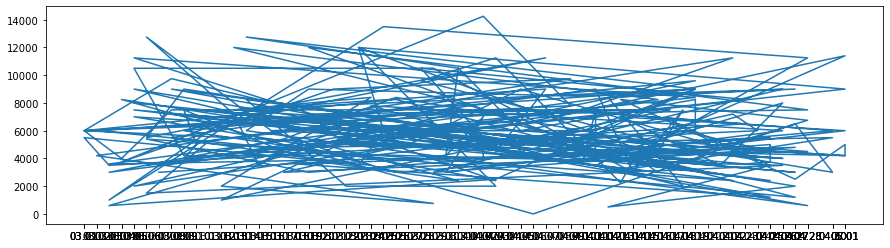

In [18]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
ax.plot(xx, yy)
ax.xaxis.set_ticks(xx)

plt.show()

*Намеков на зависимость таргета от даты нет, поэтому оставим total_points, application и coef, а также подберем доп.множитель*

In [19]:
data['new'] = data['coef'] * data['total_points'] * data['application']
X = data[['new']]

y = data['increase']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.coef_)

1.0
[500.]
